#### Libraries

In [30]:
import serial.tools.list_ports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import re

#### Capacitive Sensor Data Processing: ####

In [41]:
#Choose between Reading from Serial Port (serial=1) or Reading JSON file coming from WEB_UI(BLE):
serial = 0;
face_right_channel_eyebrows, face_right_channel_cheekbones, face_right_channel_nose, face_right_channel_mouth, face_left_channel_eyebrows, face_left_channel_cheekbones, face_left_channel_nose, face_left_channel_mouth  = [], [], [], [], [], [], [], []
#READ SERIAL PORT:
if serial == 1:
    #Configure Serial Port:
    ports = serial.tools.list_ports.comports()
    serialInst = serial.Serial()
    portlist = []

    for onePort in ports:
        portlist.append(str(onePort))
        print(str(onePort))

    print("Available Ports:", portlist)
    val = input("select Port: COM")
    portVar = "COM" + str(val)      
    serialInst.baudrate = 115200
    serialInst.port = portVar
    serialInst.open()

    #Fetch Data from Serial Port:
    sensor_data = []
    while True:
        if serialInst.in_waiting:
            packet = str(serialInst.readline())
            packet = packet.replace("b'","").replace("\\r\\n'","")
            packet = packet.split(',')
            sensor_data.append(packet)
            print(packet)
    
    sensor_data.pop(0)
    for channel in sensor_data:
        #Get data from right channel:
        face_right_channel_cheekbones.append(int(channel[3]))
        face_right_channel_nose.append(int(channel[2]))
        face_right_channel_mouth.append(int(channel[1]))
        face_right_channel_eyebrows.append(int(channel[0]))
        #Get data from left channel:
        face_left_channel_cheekbones.append(int(channel[7]))
        face_left_channel_nose.append(int(channel[6]))
        face_left_channel_mouth.append(int(channel[5]))
        face_left_channel_eyebrows.append(int(channel[4]))
    
    #READ JSON FILE:        
else:
    # Opening JSON file
    f = open('Head_JSON.json')
    # returns JSON object as a dictionary
    dict_json = json.load(f)
    df = pd.DataFrame(dict_json)
    # Closing file
    f.close()
    #Get data from right channel:
    face_right_channel_eyebrows = df["cap_2_1"].to_list()
    face_right_channel_mouth= df["cap_2_2"].to_list()
    face_right_channel_nose= df["cap_2_3"].to_list()
    face_right_channel_cheekbones= df["cap_2_4"].to_list()
    #Get data from left channel:
    face_left_channel_eyebrows = df["cap_1_1"].to_list()
    face_left_channel_mouth= df["cap_1_2"].to_list()
    face_left_channel_nose= df["cap_1_3"].to_list()
    face_left_channel_cheekbones= df["cap_1_4"].to_list()

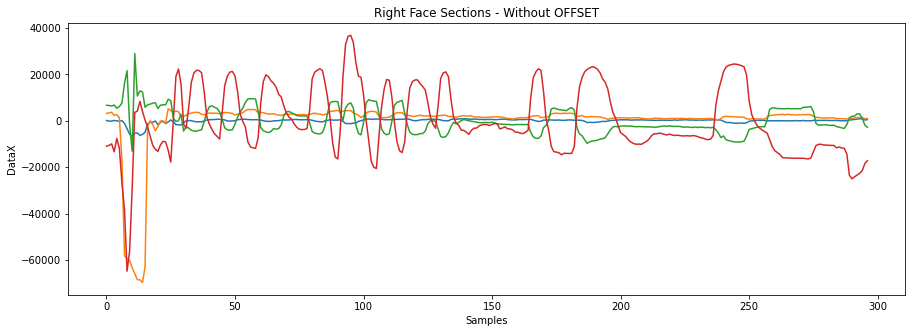

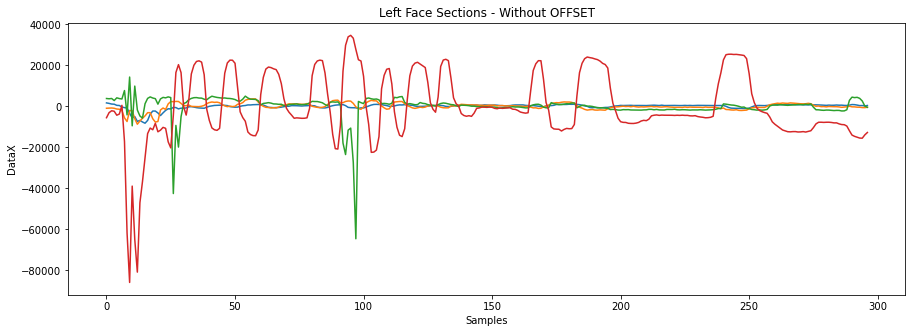

In [42]:
#Substract the mean value for each channel.
#Right channels:
face_right_channel_eyebrows = face_right_channel_eyebrows - np.mean(face_right_channel_eyebrows)
face_right_channel_cheekbones = face_right_channel_cheekbones - np.mean(face_right_channel_cheekbones)
face_right_channel_nose = face_right_channel_nose - np.mean(face_right_channel_nose)
face_right_channel_mouth = face_right_channel_mouth - np.mean(face_right_channel_mouth)
#PLOT Right Face Sections - Without OFFSET
plt.figure(figsize=(15, 5))
plt.plot(face_right_channel_eyebrows)
plt.plot(face_right_channel_cheekbones)
plt.plot(face_right_channel_nose)
plt.plot(face_right_channel_mouth)
plt.title('Right Face Sections - Without OFFSET')
plt.xlabel('Samples')
plt.ylabel('DataX')
plt.show()
#Left channels:
face_left_channel_eyebrows = face_left_channel_eyebrows - np.mean(face_left_channel_eyebrows)
face_left_channel_cheekbones = face_left_channel_cheekbones - np.mean(face_left_channel_cheekbones)
face_left_channel_nose = face_left_channel_nose - np.mean(face_left_channel_nose)
face_left_channel_mouth = face_left_channel_mouth - np.mean(face_left_channel_mouth)
#PLOT Left Face Sections - Without OFFSET
plt.figure(figsize=(15, 5))
plt.plot(face_left_channel_eyebrows)
plt.plot(face_left_channel_cheekbones)
plt.plot(face_left_channel_nose)
plt.plot(face_left_channel_mouth)
plt.title('Left Face Sections - Without OFFSET')
plt.xlabel('Samples')
plt.ylabel('DataX')
plt.show()

#Save values in Excel file:
face_dict = {
  "Right-Eyebrows": face_right_channel_eyebrows,
  "Left-Eyebrows": face_left_channel_eyebrows,
  "Right-Cheekbones": face_right_channel_cheekbones,
  "Left-Cheekbones": face_left_channel_cheekbones,
  "Right-Nose": face_right_channel_nose,
  "Left-Nose": face_left_channel_nose,
  "Right-Mouth": face_right_channel_mouth,
  "Left-Mouth": face_left_channel_mouth
}
file_name = "Capacitive_Values_FaceShield.xlsx"
df = pd.DataFrame(face_dict)
writer = pd.ExcelWriter(file_name, engine='xlsxwriter')
df.to_excel(writer, sheet_name='welcome', index=False)
writer.save()

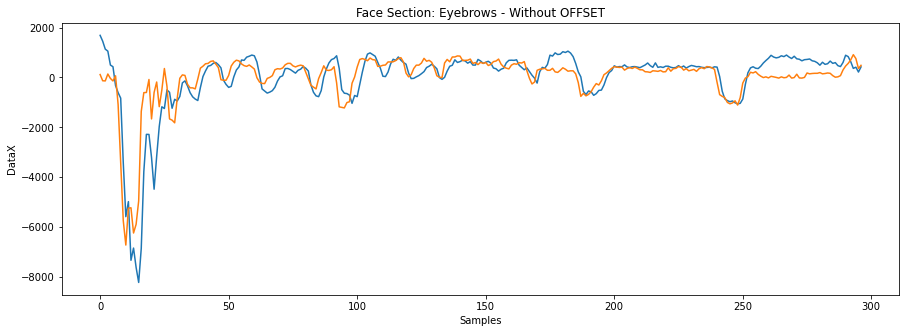

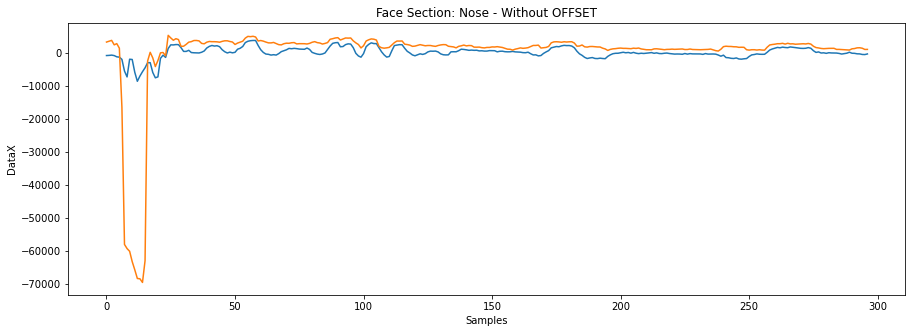

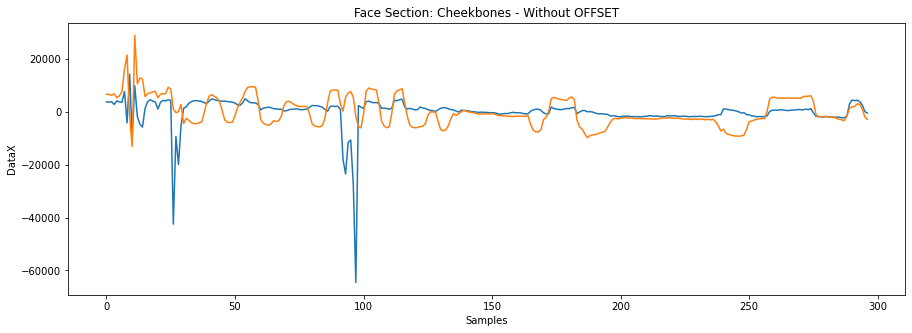

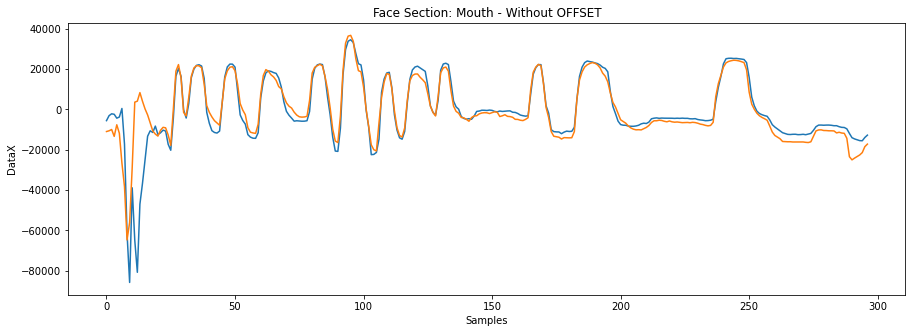

In [43]:
#PLOT Face Section: Eyebrows
plt.figure(figsize=(15, 5))
plt.plot(face_left_channel_eyebrows)
plt.plot(face_right_channel_eyebrows)
plt.title('Face Section: Eyebrows - Without OFFSET')
plt.xlabel('Samples')
plt.ylabel('DataX')
plt.show()
#PLOT Face Section: Nose
plt.figure(figsize=(15, 5))
plt.plot(face_left_channel_cheekbones)
plt.plot(face_right_channel_cheekbones)
plt.title('Face Section: Nose - Without OFFSET')
plt.xlabel('Samples')
plt.ylabel('DataX')
plt.show()
#PLOT Face Section: Cheekbones
plt.figure(figsize=(15, 5))
plt.plot(face_left_channel_nose)
plt.plot(face_right_channel_nose)
plt.title('Face Section: Cheekbones - Without OFFSET')
plt.xlabel('Samples')
plt.ylabel('DataX')
plt.show()
#PLOT Face Section: Mouth
plt.figure(figsize=(15, 5))
plt.plot(face_left_channel_mouth)
plt.plot(face_right_channel_mouth)
plt.title('Face Section: Mouth - Without OFFSET')
plt.xlabel('Samples')
plt.ylabel('DataX')
plt.show()